# Projekt ZUM - Streszczenie tekstu

## Wstępna analiza

In [1]:
! pip install datasets transformers torch accelerate dash plotly jupyter-dash rouge-score evaluate

In [2]:
from datasets import load_dataset

ds = load_dataset("abisee/cnn_dailymail", "3.0.0")
cap = 500
df_train = ds['train'].to_pandas()
df_train = df_train[df_train['article'].str.len() < cap]

df_val = ds['validation'].to_pandas()
df_val = df_val[df_val['article'].str.len() < cap]

df_test = ds['test'].to_pandas()
df_test = df_test[df_test['article'].str.len() < cap]

/opt/homebrew/Caskroom/miniconda/base/envs/ml/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
ds

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [4]:
import pandas as pd

pd.set_option('display.max_colwidth', 500)

df_train

,article,highlights,id
293,• The twins get a check-up (2/26/08) • VIDEO: Nancy Grace introduces on set 2-14-08 • The twins go out for a stroll (2/11/08) • The twins at 3 months (2/4/08) • The twins in January (1/21/08) • VIDEO: First video of Nancy Grace's twins E-mail to a friend .,"Pictures of Nancy Grace's twins .\nJohn David and Lucy Elizabeth were born November 4, 2007 .\nCome back to this site for regularly updated pictures!",9cce7373a54faccf5b5d1232c82afab9b29ab6b9
1511,(CNN) -- The U.S. Commission on International Religious Freedom cited several examples in a recent report of abuse toward Christians in Iraq. Iraqis rush to a car bomb explosion at a Christian church in Kirkuk in January.,"U.S. panel reports examples of intimidation, violence against Christians in Iraq .\nReport: Christians urged to convert to Islam, attacked if they don't obey Islamic laws .\nChristian priests, missionaries have been kidnapped and killed, report says .",578d4784656d2b462895cfc89b3481a231ebfb51
1706,Congressman Jared Polis . (D) Colorado: District 02 . Congressman Jason Chaffetz . (R) Utah: District 03 .,Two freshman representatives document their experience for CNN .\nRep. Jared Polis is a Democrat representing Colorado's Second district .\nRep. Jason Chaffetz is a Republican representing Utah's Third district .,86bd905861391cbd3a98de15c83768b6d1400304
2811,"(CNN) -- Each year, Dr. Paul Dell and his wife, Ruthie, host Hand Camp, a refuge for children and teens with upper-limb abnormalities. Campers get to try arts and crafts, archery, and rope climbing in an environment away from teasing. The Dells, along with their staff of therapists and volunteers, work with the kids and their parents, offering advice and answering medical questions. More than 300 participated in this year's Hand Camp in Starke, Florida.","Many of the campers are patients of the camp's co-founder, Dr. Paul Dell .\nParent sessions are held to give advice to families, especially about teasing .\nThe camp is free and will hopefully stay free, co-founder Ruthie Dell says .",ac19c7c394491dfbf19af9b82c9f5bcf0bb3d944
2902,Congressman Jared Polis . (D) Colorado: District 02 . Congressman Jason Chaffetz . (R) Utah: District 03 .,Video: Hand-held cams track freshmen moves .\nTwo freshman representatives document their experience for CNN .\nRep. Jared Polis is a Democrat representing Colorado's Second district .\nRep. Jason Chaffetz is a Republican representing Utah's Third district .,fd4bd93f0e11cec9a6c3f50441b6023b1e582581
...,...,...,...
227432,"New Land Rover Discovery Sport . HSE Luxury 2.2L SD4 diesel . On sale: early 2015 Price: £41,195 . GOOD . Ray Massey (pictured) tests the features on the new seven-seater Land Rover Discovery Sport in Iceland . BAD .","The fantastic flexibility of features makes this car great for families .\nThe car is highly rated with more emergency braking and stability control .\nOnly the 2.2 litre SD4 diesel version will be on sale in the UK .\nJust in time for the Christmas break, I took the handsome new seven-seater Discovery Sport to Iceland — no, not the High Street frozen food chain, but a proper epic across ice and snow-covered landscapes on that Viking island south of the Arctic Circle.\nWe may have been promi...",312e711025d29e08594ceea541baf7903c548795
228230,"Volkswagen Passat Estate SE Business 2.0 TDI 150PS . Price as driven: £31,270 . GOOD . The Volkswagen Passat Estate SE Business 2.0 TDI 150PS (pictured) is the eighth generation of the model . BAD . The Passat has been around for 42 years, pictured here is the first generation of the model in 1973 .","The Passat has been around for 42 years, the first model came out in 1973 .\nThe estate car is the fourth biggest-selling VW in the UK .\nThe new model has everything from keyless entry to heated seats .\nOnly diesel models will be on sale initially and there will be a beefed-up 4x4 version hitting the road in July .\nIt's hard to believe, but the Passat has been around for 42 years

In [5]:
# wyświetlanie przykładowej pary tekst - streszczenie
df_train.head(1)[["article", "highlights"]]

,article,highlights
293,• The twins get a check-up (2/26/08) • VIDEO: Nancy Grace introduces on set 2-14-08 • The twins go out for a stroll (2/11/08) • The twins at 3 months (2/4/08) • The twins in January (1/21/08) • VIDEO: First video of Nancy Grace's twins E-mail to a friend .,"Pictures of Nancy Grace's twins .\nJohn David and Lucy Elizabeth were born November 4, 2007 .\nCome back to this site for regularly updated pictures!"


In [6]:
# średnia długość tekstu i średnia długość streszczeń
import numpy as np

def words_count(text):
    return len(text.split())

text_len = [words_count(x) for x in df_train["article"]]
summary_len = [words_count(x) for x in df_train["highlights"]]

print(f"średnia długość tekstu (wyrazy): {np.mean(text_len)}")
print(f"średnia długość streszczeń (wyrazy): {np.mean(summary_len)}")

średnia długość tekstu (wyrazy): 62.88796680497925
średnia długość streszczeń (wyrazy): 39.25311203319502


In [7]:
ratios = [s_len / t_len for s_len, t_len in zip(summary_len, text_len)]
print(f"Średnia proporcja długości streszczeń do tekstów: {np.mean(ratios):.2f}")


Średnia proporcja długości streszczeń do tekstów: 0.75


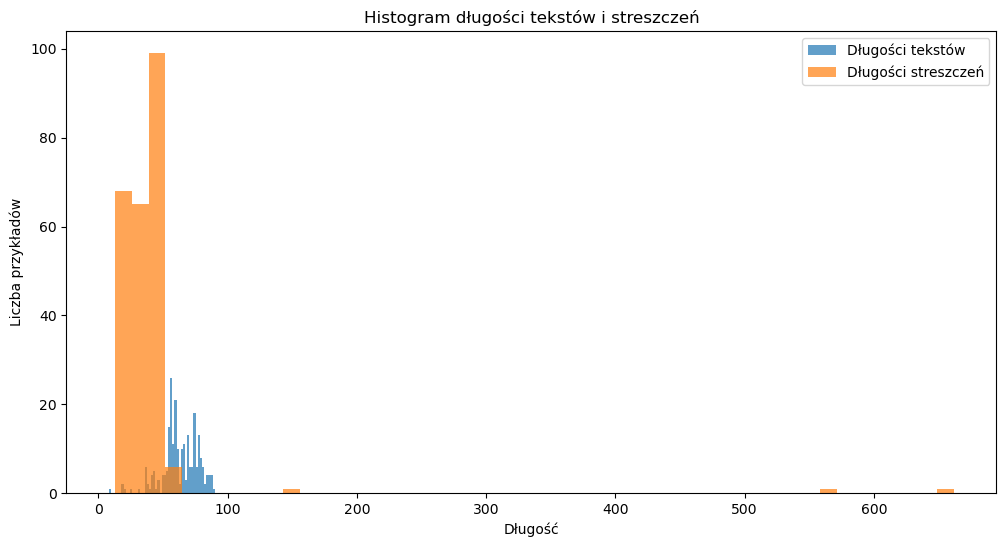

In [8]:
import matplotlib.pyplot as plt

# Histogramy
plt.figure(figsize=(12, 6))
plt.hist(text_len, bins=50, alpha=0.7, label="Długości tekstów")
plt.hist(summary_len, bins=50, alpha=0.7, label="Długości streszczeń")
plt.legend()
plt.title("Histogram długości tekstów i streszczeń")
plt.xlabel("Długość")
plt.ylabel("Liczba przykładów")
plt.show()


In [9]:
# Najdłuższy i najkrótszy artykuł
longest_article = max(df_train["article"], key=lambda x: words_count(x))
shortest_article = min(df_train["article"], key=lambda x: words_count(x))

print(f"Najdłuższy artykuł (liczba słów: {words_count(longest_article)}):\n{longest_article[:500]}...\n")
print(f"Najkrótszy artykuł (liczba słów: {words_count(shortest_article)}):\n{shortest_article[:500]}\n")

# Najdłuższe i najkrótsze streszczenie
longest_summary = max(df_train["highlights"], key=lambda x: words_count(x))
shortest_summary = min(df_train["highlights"], key=lambda x: words_count(x))

print(f"Najdłuższe streszczenie (liczba słów: {words_count(longest_summary)}):\n{longest_summary[:500]}...\n")
print(f"Najkrótsze streszczenie (liczba słów: {words_count(shortest_summary)}):\n{shortest_summary[:500]}\n")

Najdłuższy artykuł (liczba słów: 90):
(CNN) -- This time of year, it seems like a new phone comes out every couple days. With the Apple's brand-new iPhone 5 now on sale, here's a roundup of some of the hottest smartphones on the market, along with a few that are coming soon. Many of these gadgets are getting faster and bigger -- so big, in some cases, they won't fit in a pocket. For the most part, tactile keyboards are disappearing, too. Take a look and let us know what you think in the comments section....

Najkrótszy artykuł (liczba słów: 8):
Downton Abbey's famously grim butler, Mr Bates .

Najdłuższe streszczenie (liczba słów: 662):
The Passat has been around for 42 years, the first model came out in 1973 .
The estate car is the fourth biggest-selling VW in the UK .
The new model has everything from keyless entry to heated seats .
Only diesel models will be on sale initially and there will be a beefed-up 4x4 version hitting the road in July .
It's hard to believe, but the Passat ha

In [10]:
from collections import Counter

# Tokenizacja i liczenie słów
df_train['article_word_count'] = df_train['article'].apply(lambda x: words_count(x))
df_train['summary_word_count'] = df_train['highlights'].apply(lambda x: words_count(x))

# Najczęściej występujące słowa w streszczeniach
all_summaries = " ".join(df_train['highlights'])
word_counts = Counter(all_summaries.split())
print(word_counts.most_common(10))


[('.', 664), ('the', 301), ('of', 269), ('to', 266), ('and', 185), ('a', 178), ('CNN', 155), ('on', 153), ('in', 150), ('The', 150)]


## Inżynieria cech

In [11]:
import re

def clean_text(text):
  text = re.sub(r'http[s]?://\S+', '', text)
  text = text.strip().replace('\n', ' ').replace('\r', ' ')
  text = re.sub(r'\s+', ' ', text)
  return text

train_data = ds['train'].filter(lambda row: len(row['article']) < cap)
train_data = train_data_map = train_data.map(lambda x: {'article': clean_text(x['article']), 'highlights': clean_text(x['highlights'])})
val_data = ds['validation'].filter(lambda row: len(row['article']) < cap).map(lambda x: {'article': clean_text(x['article']), 'highlights': clean_text(x['highlights'])})
test_data = ds['test'].filter(lambda row: len(row['article']) < cap).map(lambda x: {'article': clean_text(x['article']), 'highlights': clean_text(x['highlights'])})

train_data[:2], val_data[:2], test_data[:2]

({'article': ["• The twins get a check-up (2/26/08) • VIDEO: Nancy Grace introduces on set 2-14-08 • The twins go out for a stroll (2/11/08) • The twins at 3 months (2/4/08) • The twins in January (1/21/08) • VIDEO: First video of Nancy Grace's twins E-mail to a friend .",
   '(CNN) -- The U.S. Commission on International Religious Freedom cited several examples in a recent report of abuse toward Christians in Iraq. Iraqis rush to a car bomb explosion at a Christian church in Kirkuk in January.'],
  'highlights': ["Pictures of Nancy Grace's twins . John David and Lucy Elizabeth were born November 4, 2007 . Come back to this site for regularly updated pictures!",
   "U.S. panel reports examples of intimidation, violence against Christians in Iraq . Report: Christians urged to convert to Islam, attacked if they don't obey Islamic laws . Christian priests, missionaries have been kidnapped and killed, report says ."],
  'id': ['9cce7373a54faccf5b5d1232c82afab9b29ab6b9',
   '578d4784656d2b4

In [12]:
from transformers import AutoTokenizer

model_name = "t5-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_data(examples):
    inputs = [f"summarize: {article}" for article in examples['article']]
    targets = examples['highlights']

    model_inputs = tokenizer(
        inputs,
        max_length=512,
        truncation=True,
        padding="max_length",
        return_tensors="pt",
    )

    model_inputs['labels'] = tokenizer(
        targets,
        max_length=150,
        truncation=True,
        padding="max_length",
        return_tensors="pt",
    )['input_ids']

    return model_inputs

train_data_tokenized = train_data.map(
    tokenize_data,
    batched=True,
    remove_columns=['article', 'highlights'],
    batch_size=128,
)

val_data_tokenized = val_data.map(
    tokenize_data,
    batched=True,
    remove_columns=['article', 'highlights'],
    batch_size=128,
)

test_data_tokenized = test_data.map(
    tokenize_data,
    batched=True,
    remove_columns=['article', 'highlights'],
    batch_size=128,
)

train_data_tokenized = train_data_tokenized.with_format("torch")
val_data_tokenized = val_data_tokenized.with_format("torch")
test_data_tokenized = test_data_tokenized.with_format("torch")

print(train_data_tokenized[0])

{'id': '9cce7373a54faccf5b5d1232c82afab9b29ab6b9', 'input_ids': tensor([21603,    10,  1697,    37,  7390,     7,   129,     3,     9,   691,
           18,   413,  4743,    87,  2688,    87,  4018,    61,  1697,   584,
        13162,   667,    10, 17117, 12254,  4277,     7,    30,   356,   204,
        11590,    18,  4018,  1697,    37,  7390,     7,   281,    91,    21,
            3,     9, 13593,  4743, 20223,    87,  4018,    61,  1697,    37,
         7390,     7,    44,   220,   767,  4743, 13572,    87,  4018,    61,
         1697,    37,  7390,     7,    16,  1762,    41, 17637, 12989,  4018,
           61,  1697,   584, 13162,   667,    10,  1485,   671,    13, 17117,
        12254,    31,     7,  7390,     7,   262,    18,  1963,    12,     3,
            9,  1565,     3,     5,     1,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,


In [13]:
train_data_tokenized

Dataset({
    features: ['id', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 241
})

## Model

In [14]:
from evaluate import load

rouge = load("rouge")

def compute_metrics(p):
    predictions, labels = p
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    return result

In [15]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer

model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=2,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=5,
    predict_with_generate=True,
    logging_dir='./logs',
    logging_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    save_steps=1000,
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_data_tokenized,
    eval_dataset=val_data_tokenized,
    processing_class=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,No log,5.865154,0.290445,0.154126,0.236139,0.236139
2,No log,4.369692,0.290445,0.154126,0.236139,0.236139
3,No log,3.471641,0.309612,0.149724,0.231992,0.227494
4,No log,3.063785,0.286806,0.137715,0.224193,0.222471
5,No log,2.950864,0.264139,0.120572,0.199805,0.199805


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=40, training_loss=5.428196716308594, metrics={'train_runtime': 85.8084, 'train_samples_per_second': 14.043, 'train_steps_per_second': 0.466, 'total_flos': 163086870773760.0, 'train_loss': 5.428196716308594, 'epoch': 5.0})

In [16]:
results = trainer.evaluate(eval_dataset=val_data_tokenized)
print(results)

{'eval_loss': 2.950863838195801, 'eval_rouge1': 0.26413924680139245, 'eval_rouge2': 0.12057245080500896, 'eval_rougeL': 0.19980481335804814, 'eval_rougeLsum': 0.19980481335804814, 'eval_runtime': 0.7163, 'eval_samples_per_second': 6.98, 'eval_steps_per_second': 1.396, 'epoch': 5.0}


In [17]:
test_results = trainer.evaluate(eval_dataset=test_data_tokenized)
print(test_results)

{'eval_loss': 3.0521738529205322, 'eval_rouge1': 0.21697094973193018, 'eval_rouge2': 0.0998015666053883, 'eval_rougeL': 0.18244975159094057, 'eval_rougeLsum': 0.18155494728385202, 'eval_runtime': 1.5349, 'eval_samples_per_second': 5.864, 'eval_steps_per_second': 0.652, 'epoch': 5.0}


In [18]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

test_sample = test_data_tokenized[1]
decoded_input = tokenizer.decode(test_sample['input_ids'], skip_special_tokens=True)
print(decoded_input)

input_ids = test_sample['input_ids']
outputs = model.generate(input_ids=input_ids.unsqueeze(0), max_length=250, num_beams=4, no_repeat_ngram_size=2, temperature=1.0)
print(f"TYPE: type{outputs}")

decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(decoded_output)

summarize: Reanne Evans, the 10-time ladies' snooker world champion, begins her bid to make history and reach the World Championship finals. The 29-year-old from Dudley would be the first woman ever to reach The Crucible should she win three qualifiers, but she faces a tough start in the form of 1997 world champion Ken Doherty. Watch all the action below with our live video. Reanne Evans faces Ken Doherty (right) in her first qualifier for the World Championship.
TYPE: typetensor([[    0,     8,  9445,   715, 10989,    31,     3,     7, 22563,    49,
           296,  6336,  4396,   160,  6894,    12,   143,   892,    11,  1535,
             8,   296, 10183,   804,     7,     3,     5,     8,  2838,    18,
          1201,    18,  1490,   133,    36,     8,   166,  2335,   664,    12,
          1535,    37, 30701,  2296,     3,    99,   255,  1369,   386, 10597,
           277,     6,    68,   255,  8519,     3,     9,  3429,   456,    16,
             8,   607,    13,  6622,   296, 1612

In [19]:
model.save_pretrained("./fine_tuned_model")
tokenizer.save_pretrained("./fine_tuned_model")

('./fine_tuned_model/tokenizer_config.json',
 './fine_tuned_model/special_tokens_map.json',
 './fine_tuned_model/tokenizer.json')